# Foundations for statistical inference - Confidence intervals

### If you have access to data on an entire population, say the size of every house in Ames, Iowa, it's straight forward to answer questions like, "How big is the typical house in Ames?" and "How much variation is there in sizes of houses?". If you have access to only a sample of the population, as is often the case, the task becomes more complicated. What is your best guess for the typical size if you only know the sizes of several dozen houses? This sort of situation requires that you use your sample to make inference on what your population looks like.

### In the previous lab, "Sampling Distributions", we looked at the population data of houses from Ames, Iowa. Let's start by loading that data set.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/ames.csv'
url_content = requests.get(df_url, verify=False).content
ames = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [2]:
ames.head()

Order        PID  MS.SubClass MS.Zoning  Lot.Frontage  Lot.Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot.Shape Land.Contour  ... Pool.Area Pool.QC  Fence Misc.Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc.Val Mo.Sold Yr.Sold Sale.Type  Sale.Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

### In this lab we'll start with a simple random sample of size 60 from the population.

In [3]:
population = ames['Gr.Liv.Area']
samp = population.sample(60)

In [4]:
population.describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr.Liv.Area, dtype: float64

In [5]:
samp.mean()

1494.9833333333333

### Based only on this single sample, the best estimate of the average living area of houses sold in Ames would be the sample mean, usually denoted as (here we're calling it sample_mean). That serves as a good point estimate but it would be useful to also communicate how uncertain we are of that estimate. This can be captured by using a confidence interval.

### We can calculate a 95% confidence interval for a sample mean by adding and subtracting 1.96 standard errors to the point estimate

In [6]:
import numpy as np

se = np.std(samp)/np.sqrt(60)
lower = samp.mean() - (1.96 * se)
upper = samp.mean() + (1.96 * se)
print(lower, upper)

1376.238157814993 1613.7285088516737


### The distribution of sample mean

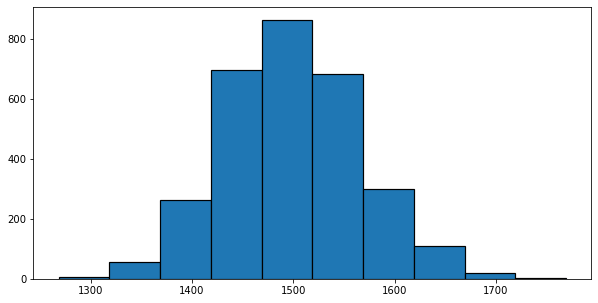

In [8]:
sample_means50 = [population.sample(60).mean() for i in range(0, 3000)]


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.hist(sample_means50, edgecolor = 'black', linewidth = 1.2)
plt.show();

### In this case we have the luxury of knowing the true population mean since we have data on the entire population.

### Does your confidence interval capture the true average size of houses in Ames?

### Now we're going to recreate many samples to learn more about how sample means and confidence intervals vary from one sample to another.

In [9]:
samp_mean = np.empty(50)
samp_sd = np.empty(50)
n = 60

In [10]:
for i in range(50):
    samp = population.sample(n) # obtain a sample of size n = 60 from the population
    samp_mean[i] = samp.mean() # save sample mean in ith element of samp_mean
    samp_sd[i] = np.std(samp) # save sample sd in ith element of samp_sd

In [11]:
se_array = samp_sd/np.sqrt(n)
lower_array = samp_mean - (1.96 * se_array)
upper_array = samp_mean + (1.96 * se_array)

## Exercise 1: What proportion of your confidence intervals include the true population mean? 

## Exercise 2: Pick a confidence level of your choosing (again for size=60), provided it is not 95% and calculate 50 confidence intervals at the confidence level you chose. What proportion of your confinence intervals include the true population mean?

## Exercise 3: Repeat exercise 2 for the same size of confidence interval but for sample size =100. What do you notice?